____________________________________________
____________________________________________
**IRIS FLOWER CLASSIFICATION**
____________________________________________
____________________________________________


importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

Importing Request dataset

In [3]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


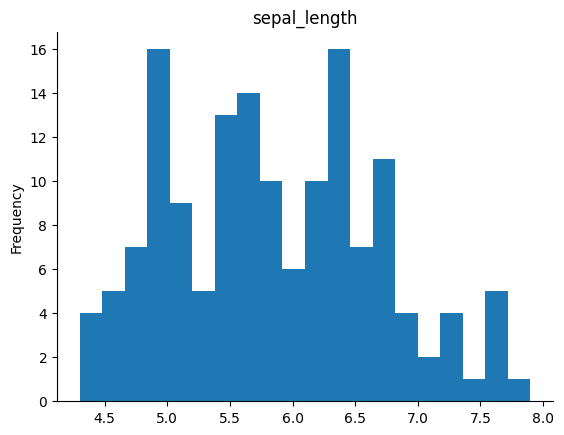

In [25]:
from matplotlib import pyplot as plt
df['sepal_length'].plot(kind='hist',bins=20, title='sepal_length')
plt.gca().spines[['top','right',]].set_visible(False)
plt.show()

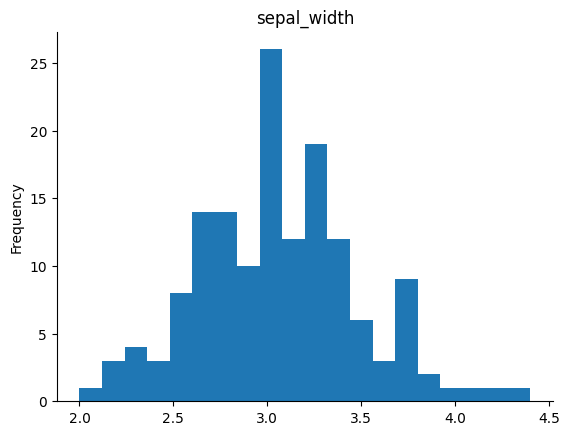

In [24]:
from matplotlib import pyplot as plt
df['sepal_width'].plot(kind='hist',bins=20, title='sepal_width')
plt.gca().spines[['top','right',]].set_visible(False)
plt.show()

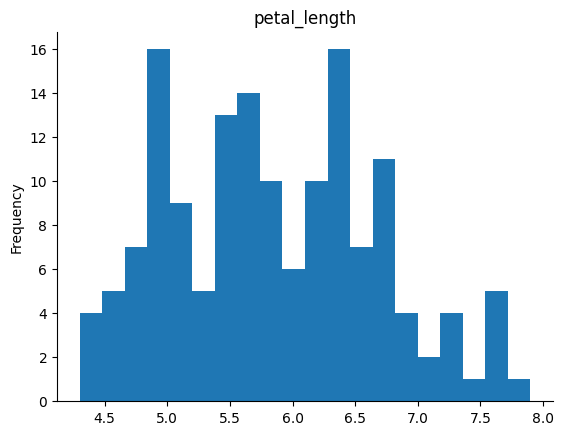

In [23]:
from matplotlib import pyplot as plt
df['sepal_length'].plot(kind='hist',bins=20, title='petal_length')
plt.gca().spines[['top','right',]].set_visible(False)
plt.show()

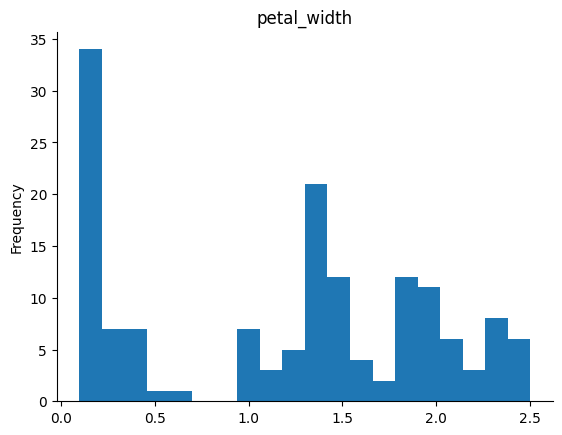

In [22]:
from matplotlib import pyplot as plt
df['petal_width'].plot(kind='hist',bins=20, title='petal_width')
plt.gca().spines[['top','right',]].set_visible(False)
plt.show()

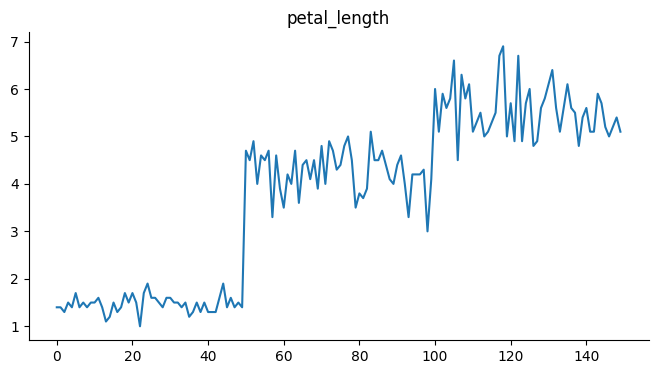

In [21]:
df['petal_length'].plot(kind='line',figsize=(8,4),title='petal_length')
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

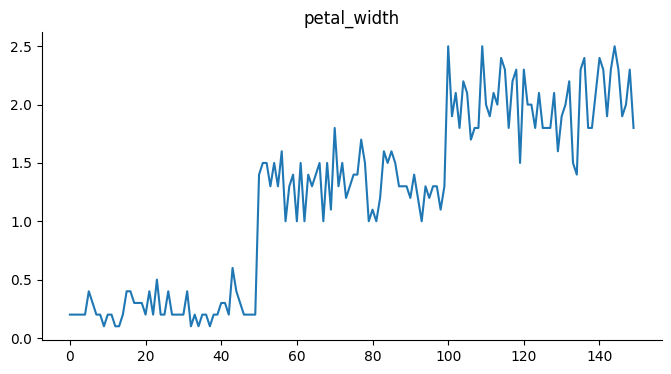

In [20]:
df['petal_width'].plot(kind='line',figsize=(8,4), title='petal_width')
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

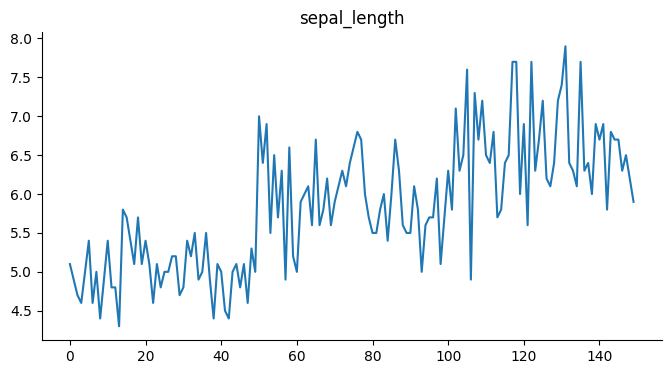

In [19]:
df['sepal_length'].plot(kind='line', figsize=(8,4), title='sepal_length')
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

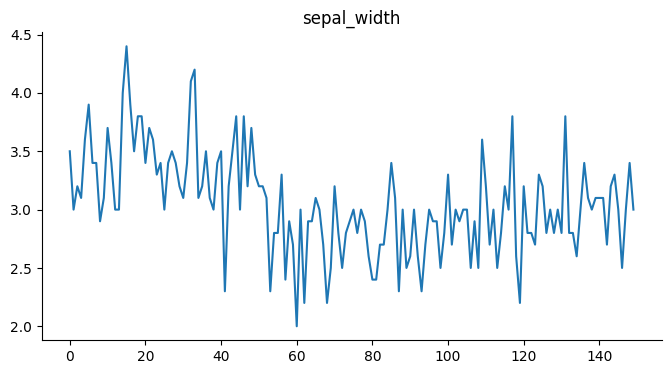

In [29]:
df['sepal_width'].plot(kind='line', figsize=(8,4), title='sepal_width')
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

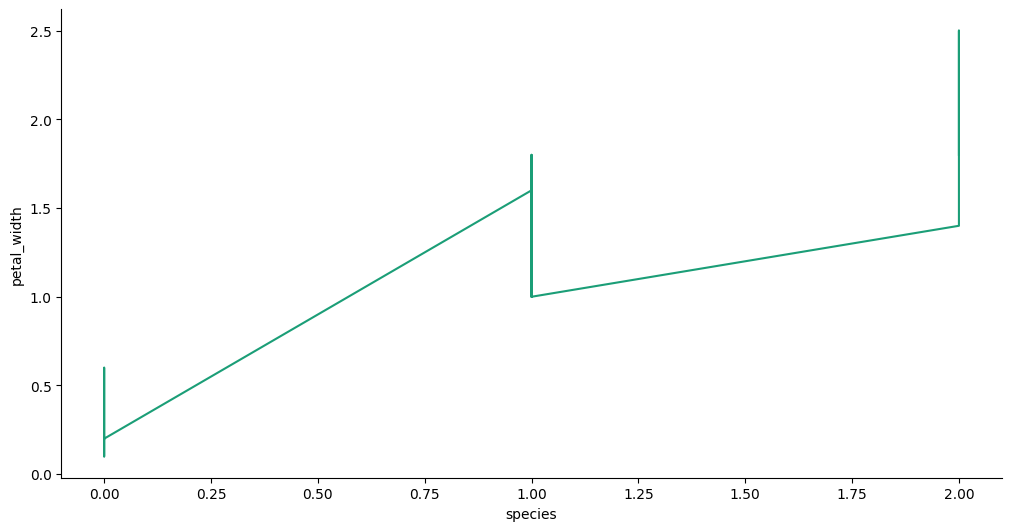

In [32]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['species']
  ys = series['petal_width']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('species', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('species')
_ = plt.ylabel('petal_width')

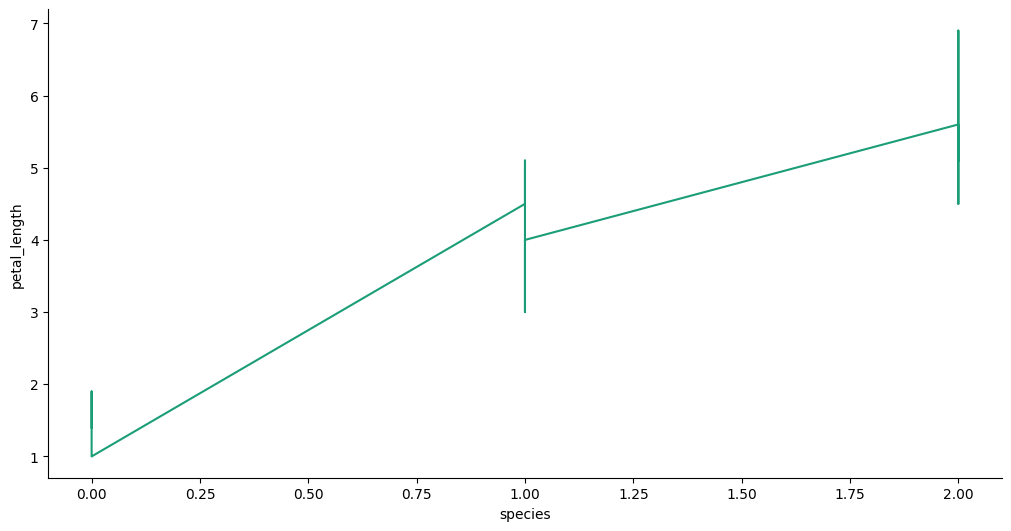

In [28]:

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['species']
  ys = series['petal_length']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('species', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('species')
_ = plt.ylabel('petal_length')

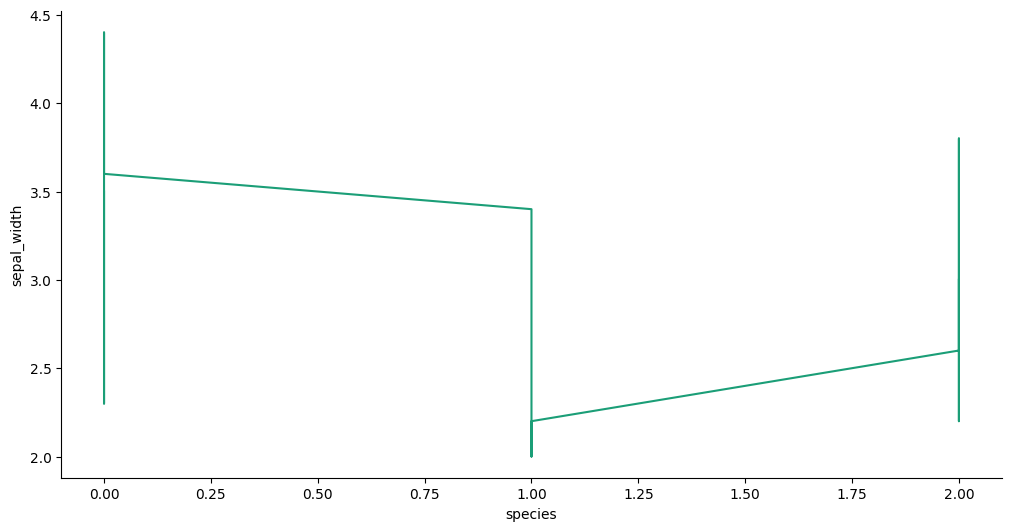

In [33]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['species']
  ys = series['sepal_width']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('species', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('species')
_ = plt.ylabel('sepal_width')


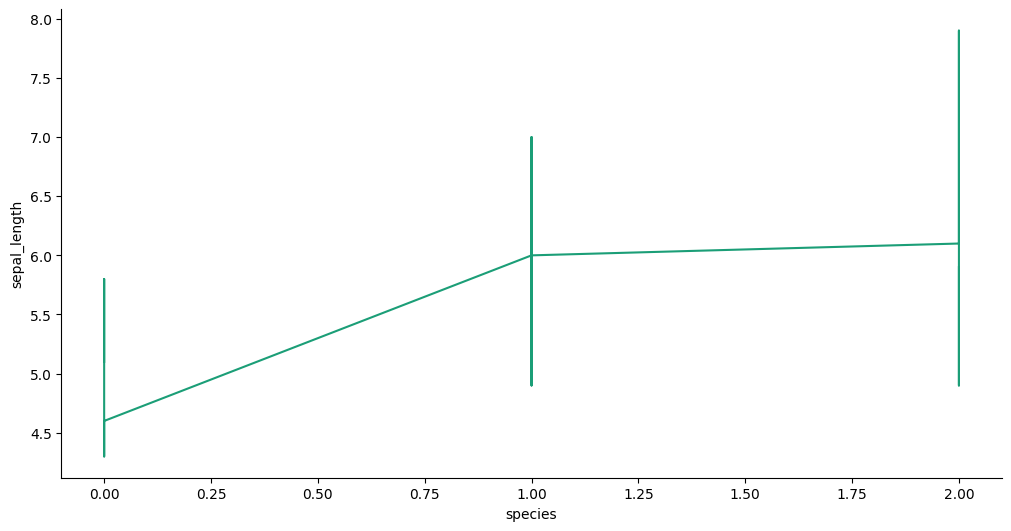

In [34]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['species']
  ys = series['sepal_length']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('species', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('species')
_ = plt.ylabel('sepal_length')


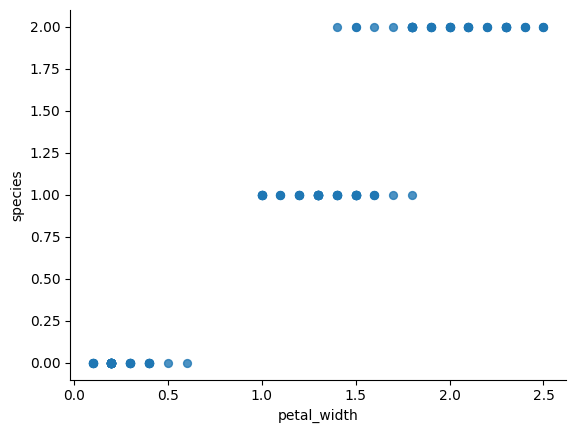

In [35]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='petal_width', y='species', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

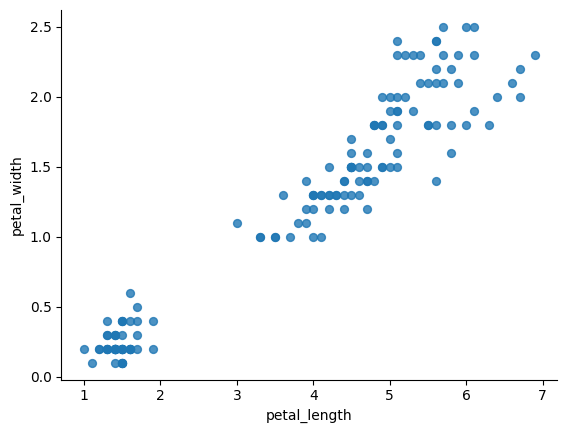

In [36]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


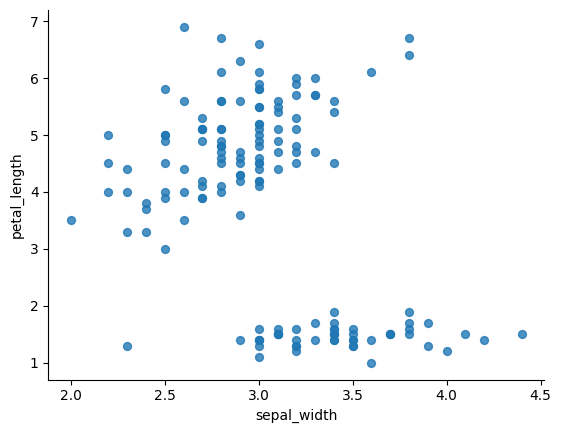

In [37]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

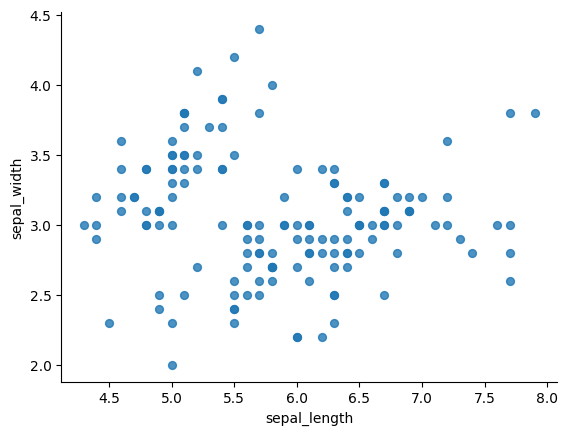

In [38]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

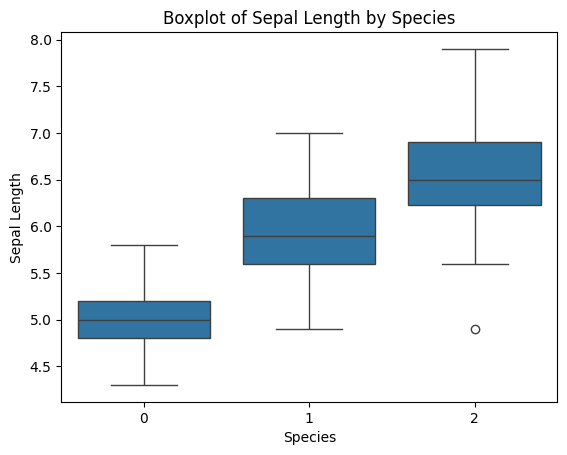

In [40]:

def remove_outliers_IQR(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[((df[column] >= lower_bound) & (df[column] <= upper_bound))]
  return df_filtered

df_filtered = remove_outliers_IQR(df, 'sepal_length')

sns.boxplot(data=df_filtered, x='species', y='sepal_length')
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

In [42]:
x=df.drop(['species'],axis=1)
y=df['species']
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [43]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<Axes: >

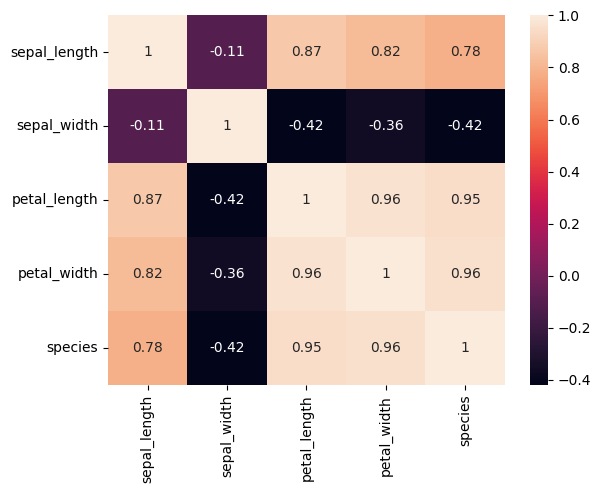

In [46]:
sns.heatmap(df.corr(),annot=True)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [48]:
lr.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [49]:
precision_score(y_test,lr.predict(x_test),average='weighted')

1.0

In [50]:
recall_score(y_test,lr.predict(x_test),average='weighted')

1.0

In [51]:
f1_score(y_test,lr.predict(x_test),average='weighted')

1.0

<Axes: >

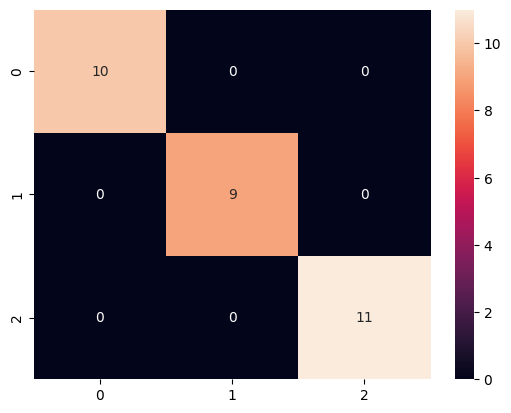

In [52]:

sns.heatmap(confusion_matrix(y_test,lr.predict(x_test)),annot=True)

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
dt.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [55]:
accuracy_score(y_test,dt.predict(x_test))

1.0

In [56]:
precision_score(y_test,dt.predict(x_test),average='weighted')

1.0

In [57]:
recall_score(y_test,dt.predict(x_test),average='weighted')

1.0

In [58]:
f1_score(y_test,dt.predict(x_test),average='weighted')

1.0

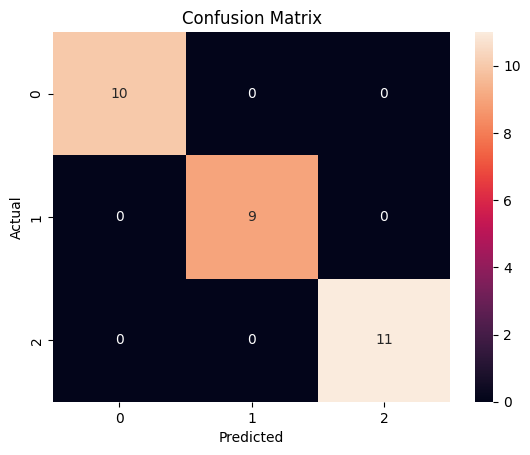

In [59]:
sns.heatmap(confusion_matrix(y_test,dt.predict(x_test)),annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()